# Классификация методом RandomForest

Этот пример призван проиллюстрировать возможности классификации методом RandomForest и оценки значимости критериев.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_parquet("train_data.pqt")
test_df = pd.read_parquet("test_data.pqt")

In [5]:
train_df.sample(3)

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster,end_cluster
42298,14099,month_2,-0.155970,-0.204339,-0.125995,-0.155504,channel_code_21,None,None,index_city_code_8,...,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201024,0.251212,0.385529,{α},{}
211989,70663,month_1,1.071157,1.812861,-0.043097,1.075423,channel_code_12,city_2872,city_type_2143,None,...,0.946066,0.430750,0.029747,0.548035,0.485465,-0.201123,0.250924,0.374540,{α},{α}
403111,134370,month_2,-0.052899,-0.023702,-0.093601,-0.052114,channel_code_5,city_78,city_type_0,None,...,0.945281,0.407762,-0.074560,0.560501,0.896576,-0.024384,0.260167,0.616298,{other},{other}


In [6]:
test_df.sample(3)

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster
20030,206903,month_6,-0.143836,-0.190364,-0.125995,-0.147227,channel_code_9,None,None,None,...,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201123,0.250924,0.374540,None
91543,231569,month_5,-0.156712,-0.204913,-0.125831,-0.156248,channel_code_9,city_21,city_type_0,index_city_code_46,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,{}
113232,239042,month_6,-0.051541,-0.116826,0.129940,-0.050752,None,city_16,city_type_0,index_city_code_26,...,-0.028584,0.944497,0.384773,-0.100893,0.547892,0.474354,-0.100532,0.252657,0.429485,None


In [3]:
train_df.info() #общая информация о столбцах, типах и пропущенных значениях

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 93 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       600000 non-null  int64  
 1   date                     600000 non-null  object 
 2   balance_amt_avg          534423 non-null  float64
 3   balance_amt_max          534423 non-null  float64
 4   balance_amt_min          534423 non-null  float64
 5   balance_amt_day_avg      534423 non-null  float64
 6   channel_code             557150 non-null  object 
 7   city                     521656 non-null  object 
 8   city_type                521656 non-null  object 
 9   index_city_code          274776 non-null  object 
 10  ogrn_days_end_month      568527 non-null  float64
 11  ogrn_days_end_quarter    568527 non-null  float64
 12  ogrn_month               568527 non-null  object 
 13  ogrn_year                568527 non-null  object 
 14  ft_r

In [4]:
test_df.describe() #общие статистики

,id,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,ogrn_days_end_month,ogrn_days_end_quarter,ft_registration_date,max_founderpres,min_founderpres,...,cnt_days_deb_g_oper_3m,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m
count,290120.000000,260637.000000,260637.000000,260637.000000,260637.000000,275842.000000,275842.000000,275282.000000,128928.000000,128928.000000,...,210553.000000,290120.000000,210553.000000,210553.000000,290120.000000,210553.000000,210553.000000,290120.000000,210553.000000,210553.000000
mean,250005.735096,-0.020511,-0.020649,-0.019761,-0.020798,-0.004400,-0.009350,0.030700,0.040347,0.025407,...,0.813698,0.001407,0.946254,0.411172,-0.003807,0.551103,0.507374,-0.014275,0.255138,0.451548
std,28867.600405,0.785641,0.918574,0.837370,0.781147,1.002956,1.000344,1.018704,1.022164,1.022974,...,0.159282,0.725831,0.013851,0.084346,0.991226,0.012784,0.159882,1.243143,0.018627,0.134758
min,200000.000000,-0.156778,-0.204962,-0.125995,-0.156315,-1.649833,-1.722458,-1.072595,-1.148774,-1.075208,...,0.728507,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201132,0.250924,0.374540
25%,225020.750000,-0.156193,-0.204351,-0.125934,-0.155773,-0.836937,-0.870685,-0.744204,-0.736914,-0.757111,...,0.728507,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201123,0.250924,0.374540
50%,249994.000000,-0.151487,-0.193288,-0.125082,-0.151186,-0.024041,-0.018912,-0.285942,-0.238645,-0.283543,...,0.739496,-0.028584,0.944497,0.384773,-0.165588,0.547176,0.429909,-0.201123,0.251501,0.396518
75%,275004.000000,-0.112382,-0.119868,-0.116374,-0.112519,0.788855,0.832860,0.448648,0.508758,0.499667,...,0.816419,-0.028584,0.944889,0.396267,-0.145296,0.549612,0.541020,-0.150320,0.253523,0.462452
max,299999.000000,77.694635,169.990705,90.583783,77.936205,1.834007,1.800784,3.085509,3.434668,3.652670,...,1.728507,176.644788,2.329746,1.430750,194.799529,1.153280,1.418798,242.034865,1.842778,1.374540


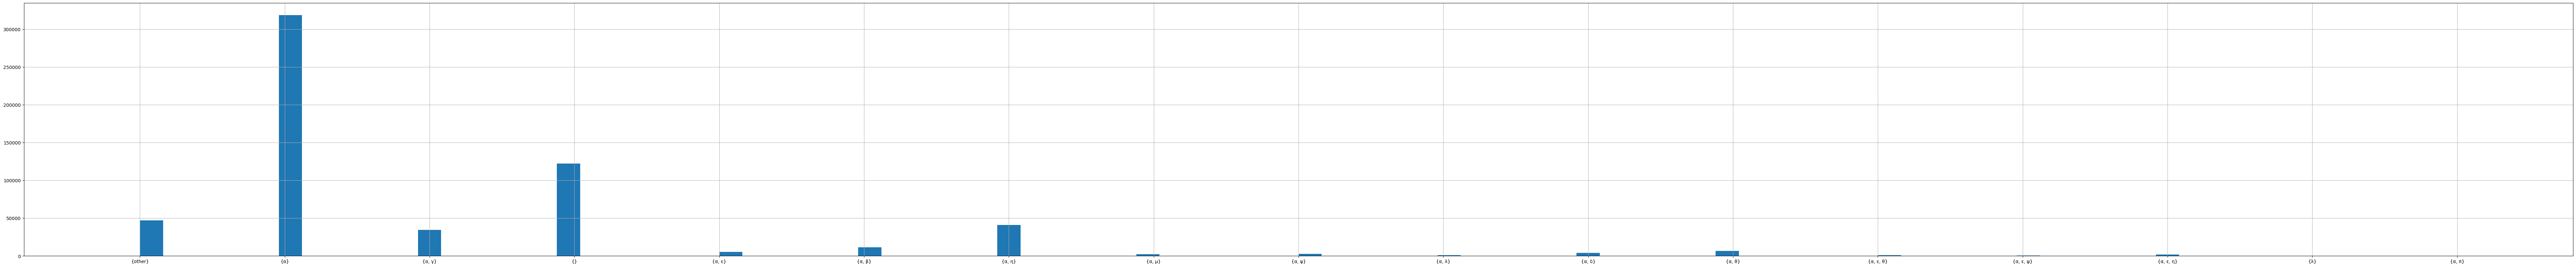

In [24]:
train_df['end_cluster'].hist(bins=100, figsize=(100,10)); # как распределено количество отзывов

Считаем, сколько раз люди меняли кластеры из имеющейся и инфы

In [30]:
train_df[train_df['start_cluster']!=train_df['end_cluster']]['date'].count()

202451

In [34]:
train_df['date'].count()

600000

Попробуем предсказать будет ли у модели больше 10 отзывов или нет. В этмо случае у нас получается сбалансированный набор данных. Ниже выведем список столбцов и отберем те, которые будем использовать для классификатора.

In [37]:
train_df.columns # список столбцов нашего датасета 

Index(['id', 'date', 'balance_amt_avg', 'balance_amt_max', 'balance_amt_min',
       'balance_amt_day_avg', 'channel_code', 'city', 'city_type',
       'index_city_code', 'ogrn_days_end_month', 'ogrn_days_end_quarter',
       'ogrn_month', 'ogrn_year', 'ft_registration_date', 'max_founderpres',
       'min_founderpres', 'ogrn_exist_months', 'okved', 'segment',
       'sum_of_paym_2m', 'sum_of_paym_6m', 'sum_of_paym_1y', 'sum_a_oper_1m',
       'cnt_a_oper_1m', 'sum_b_oper_1m', 'cnt_b_oper_1m', 'sum_c_oper_1m',
       'cnt_c_oper_1m', 'sum_deb_d_oper_1m', 'cnt_deb_d_oper_1m',
       'sum_cred_d_oper_1m', 'cnt_cred_d_oper_1m', 'sum_deb_e_oper_1m',
       'cnt_deb_e_oper_1m', 'cnt_days_deb_e_oper_1m', 'sum_cred_e_oper_1m',
       'cnt_cred_e_oper_1m', 'cnt_days_cred_e_oper_1m', 'sum_deb_f_oper_1m',
       'cnt_deb_f_oper_1m', 'cnt_days_deb_f_oper_1m', 'sum_cred_f_oper_1m',
       'cnt_cred_f_oper_1m', 'cnt_days_cred_f_oper_1m', 'sum_deb_g_oper_1m',
       'cnt_deb_g_oper_1m', 'cnt_days_de

In [39]:
train_df.sample(5)

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,...,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster
9304,203207,month_6,NaN,NaN,NaN,NaN,channel_code_12,None,None,None,...,-0.028584,NaN,NaN,-0.165588,NaN,NaN,-0.201123,NaN,NaN,None
222052,276546,month_6,-0.152671,-0.199363,-0.125667,-0.152194,channel_code_5,city_88,city_type_0,None,...,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.012313,0.258145,0.59432,None
6209,202140,month_4,-0.134210,-0.152246,-0.124663,-0.133677,channel_code_8,city_86,city_type_0,index_city_code_61,...,-0.028368,0.944889,0.396267,-0.161856,0.548895,0.474354,-0.019064,0.254390,0.48443,"{α, γ}"
142005,248947,month_4,-0.156385,-0.204464,-0.125995,-0.155941,channel_code_6,city_86,city_type_0,index_city_code_61,...,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201123,0.250924,0.37454,{α}
87500,230180,month_6,-0.130846,-0.169428,-0.107791,-0.130303,channel_code_5,city_30,city_type_0,index_city_code_42,...,-0.028584,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.201123,0.250924,0.37454,None


In [42]:
col=['date', 'balance_amt_avg', 'balance_amt_max', 'balance_amt_min',
       'balance_amt_day_avg', 'city_type', 'segment',
       'sum_of_paym_2m', 'sum_of_paym_6m', 'sum_of_paym_1y', 'sum_a_oper_1m',
       'cnt_a_oper_1m', 'sum_b_oper_1m', 'cnt_b_oper_1m', 'sum_c_oper_1m',
       'cnt_c_oper_1m', 'sum_deb_d_oper_1m', 'cnt_deb_d_oper_1m',
       'sum_cred_d_oper_1m', 'cnt_cred_d_oper_1m', 'sum_deb_e_oper_1m',
       'cnt_deb_e_oper_1m', 'cnt_days_deb_e_oper_1m', 'sum_cred_e_oper_1m',
       'cnt_cred_e_oper_1m', 'cnt_days_cred_e_oper_1m', 'sum_deb_f_oper_1m',
       'cnt_deb_f_oper_1m', 'cnt_days_deb_f_oper_1m', 'sum_cred_f_oper_1m',
       'cnt_cred_f_oper_1m', 'cnt_days_cred_f_oper_1m', 'sum_deb_g_oper_1m',
       'cnt_deb_g_oper_1m', 'cnt_days_deb_g_oper_1m', 'sum_cred_g_oper_1m',
       'cnt_cred_g_oper_1m', 'cnt_days_cred_g_oper_1m', 'sum_deb_h_oper_1m',
       'cnt_deb_h_oper_1m', 'cnt_days_deb_h_oper_1m', 'sum_cred_h_oper_1m',
       'cnt_cred_h_oper_1m', 'cnt_days_cred_h_oper_1m', 'sum_a_oper_3m',
       'cnt_a_oper_3m', 'sum_b_oper_3m', 'cnt_b_oper_3m', 'sum_c_oper_3m',
       'cnt_c_oper_3m', 'sum_deb_d_oper_3m', 'cnt_deb_d_oper_3m',
       'sum_cred_d_oper_3m', 'cnt_cred_d_oper_3m', 'sum_deb_e_oper_3m',
       'cnt_deb_e_oper_3m', 'cnt_days_deb_e_oper_3m', 'sum_cred_e_oper_3m',
       'cnt_cred_e_oper_3m', 'cnt_days_cred_e_oper_3m', 'sum_deb_f_oper_3m',
       'cnt_deb_f_oper_3m', 'cnt_days_deb_f_oper_3m', 'sum_cred_f_oper_3m',
       'cnt_cred_f_oper_3m', 'cnt_days_cred_f_oper_3m', 'sum_deb_g_oper_3m',
       'cnt_deb_g_oper_3m', 'cnt_days_deb_g_oper_3m', 'sum_cred_g_oper_3m',
       'cnt_cred_g_oper_3m', 'cnt_days_cred_g_oper_3m', 'sum_deb_h_oper_3m',
       'cnt_deb_h_oper_3m', 'cnt_days_deb_h_oper_3m', 'sum_cred_h_oper_3m',
       'cnt_cred_h_oper_3m', 'cnt_days_cred_h_oper_3m', 'start_cluster',]

# код ниже преобразует категорийные данные в переменные и заполняет пропуски наиболее вероятным значением
X=pd.DataFrame()
for i in col:
    if train_df[i].dtype.name != 'object':
        X[i]=train_df[i].copy()
        X.loc[X[i].isna(), i]=X[i].median()
    else:
        X[i]=pd.factorize(train_df[i])[0]

In [45]:
# результат, подготовленные данные
X.head(7)

,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,city_type,segment,sum_of_paym_2m,sum_of_paym_6m,sum_of_paym_1y,...,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster,end_cluster
0,0,0.744845,0.705492,1.287207,0.748101,0,0,0.942275,0.536013,0.511490,...,0.951166,0.568681,0.897565,0.553624,0.774354,0.936506,0.295984,0.967947,0,0
1,1,1.049605,0.831916,2.458609,1.053805,0,0,0.645704,0.536378,0.486425,...,0.948812,0.499716,0.785029,0.551904,0.696576,0.990157,0.298873,0.945969,0,0
2,2,0.692653,0.740253,0.430042,0.695747,0,0,0.403604,0.613167,0.480547,...,0.946458,0.442244,0.877050,0.551044,0.663243,0.810065,0.294829,0.956958,0,0
3,0,-0.081586,-0.091860,-0.114040,-0.080890,0,0,0.014051,0.043800,0.052041,...,0.945281,0.407762,0.369318,0.567093,0.785465,-0.184002,0.253523,0.462452,1,0
4,1,-0.094962,-0.100504,-0.119302,-0.094307,0,0,-0.057593,0.035027,0.033554,...,0.946066,0.430750,0.067275,0.559928,0.696576,-0.183854,0.255545,0.495419,1,0
5,2,-0.090605,-0.114275,-0.114119,-0.089937,0,0,-0.092059,0.025233,0.039472,...,0.948027,0.488221,0.043221,0.560788,0.707687,-0.167905,0.259011,0.605309,1,0
6,0,-0.154685,-0.186795,-0.122805,-0.154215,1,1,-0.255837,-0.287121,-0.291924,...,0.944497,0.384773,-0.165588,0.546889,0.407687,-0.178674,0.252657,0.440474,2,1


In [56]:
Y = train_df.apply(lambda row: 1 if row['start_cluster'] != row['end_cluster'] else 0, axis=1)

In [57]:
Y

0         1
1         1
2         1
3         0
4         0
         ..
599995    0
599996    1
599997    0
599998    0
599999    1
Length: 600000, dtype: int64

In [58]:
#разделим набор на тренировочный и тестовый
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
# создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.3651, 'end_cluster'],
 [0.2558, 'start_cluster'],
 [0.0198, 'sum_deb_e_oper_3m'],
 [0.0198, 'segment'],
 [0.0167, 'balance_amt_min'],
 [0.0165, 'balance_amt_day_avg'],
 [0.0161, 'balance_amt_max'],
 [0.0154, 'sum_cred_e_oper_3m'],
 [0.0142, 'balance_amt_avg'],
 [0.0127, 'sum_deb_e_oper_1m'],
 [0.0119, 'sum_cred_e_oper_1m'],
 [0.0104, 'sum_of_paym_1y'],
 [0.0093, 'cnt_cred_e_oper_3m'],
 [0.0092, 'city_type'],
 [0.009, 'cnt_days_cred_e_oper_3m'],
 [0.0087, 'sum_of_paym_6m'],
 [0.0086, 'cnt_deb_e_oper_3m'],
 [0.0071, 'sum_of_paym_2m'],
 [0.0069, 'cnt_days_deb_e_oper_3m'],
 [0.0061, 'sum_cred_h_oper_3m'],
 [0.0059, 'sum_deb_h_oper_3m'],
 [0.0058, 'cnt_cred_e_oper_1m'],
 [0.0056, 'cnt_deb_e_oper_1m'],
 [0.0055, 'sum_deb_f_oper_3m'],
 [0.0052, 'cnt_days_cred_e_oper_1m'],
 [0.0051, 'sum_deb_h_oper_1m'],
 [0.0051, 'cnt_days_deb_h_oper_3m'],
 [0.0049, 'cnt_days_deb_g_oper_3m'],
 [0.0048, 'sum_deb_g_oper_3m'],
 [0.0048, 'cnt_deb_g_oper_3m'],
 [0.0045, 'cnt_deb_h_oper_3m'],
 [0.0045, 'cnt_day

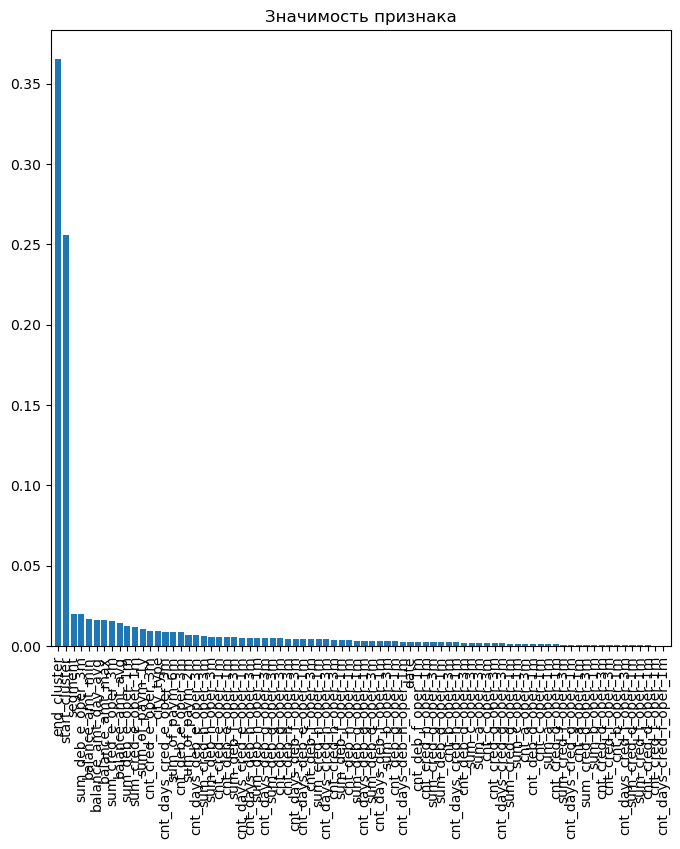

In [61]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [64]:
# как выглядит результат предсказания для тестовой выборки
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
# как выглядядт результаты тестового набора
y_test

4242      0
60608     0
392832    0
41643     0
464234    0
         ..
209840    0
241247    0
583530    0
285430    0
391044    0
Length: 120000, dtype: int64

In [66]:
# метрика r2
r2_score(model.predict(X_test), y_test)

0.9576913641900532

In [67]:
from sklearn import metrics
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.99065


In [68]:
# матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[79401,    86],
       [ 1036, 39477]], dtype=int64)

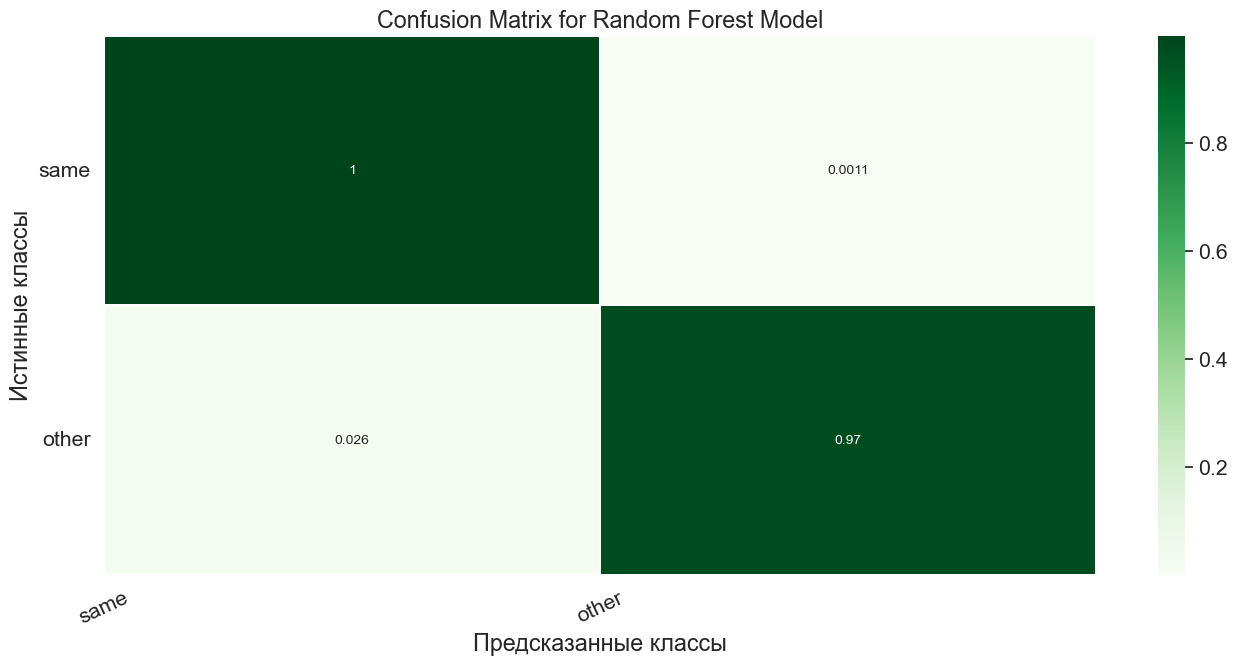

In [70]:
# так же матрица в процентах и более изящном виде
matrix = confusion_matrix(y_test, model.predict(X_test))
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['same', 'other']                 # !!!!!! указать названия классов!
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [71]:
# Еще базовые метрики оценки точности модели
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     79487
           1       1.00      0.97      0.99     40513

    accuracy                           0.99    120000
   macro avg       0.99      0.99      0.99    120000
weighted avg       0.99      0.99      0.99    120000



In [94]:
def write_to_file(data_list, accuracy):
    file_name = f'files/output_{accuracy.round(4)}.txt'
    
    with open(file_name, 'w') as file:
        for item in data_list:
            file.write(f'{item[0]}:{item[1]}\n')
        file.write(f'\nAccuracy: {accuracy}')

In [123]:
from sklearn import metrics


def generate_arrays(arr):
    for i in range(len(arr)):
        arr_without_one = arr[:i] + arr[i+1:]
        result = []
        for i in arr_without_one:
            result.append(i[1])
        yield result

    for pair in combinations(arr, 2):
        arr_without_two = [elem for elem in arr if elem not in pair]
        result = []
        for i in arr_without_two:
            result.append(i[1])
        yield result


def create_model(col):
    # код ниже преобразует категорийные данные в переменные и заполняет пропуски наиболее вероятным значением
    X=pd.DataFrame()
    for i in col:
        if train_df[i].dtype.name != 'object':
            X[i]=train_df[i].copy()
            X.loc[X[i].isna(), i]=X[i].median()
        else:
            X[i]=pd.factorize(train_df[i])[0]

    Y = train_df.apply(lambda row: 1 if row['start_cluster'] != row['end_cluster'] else 0, axis=1)

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    ar_f=[]
    for f, idx in enumerate(indices):
        ar_f.append([round(importances[idx],4), col[idx]])
    print("Значимость признака:")
    ar_f.sort(reverse=True)
    accuracy = metrics.accuracy_score(y_test, model.predict(X_test))    
    return ar_f, accuracy
    

In [ ]:
best = 0
while True:
    arrays = generate_arrays(arr)
    ar_f, acc = create_model(next(arrays))
    write_to_file(ar_f, acc)
    if acc > best:
        print(acc)
        best = acc

## матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

In [122]:
from itertools import combinations

arr = [[0.0735, 'start_cluster'],
 [0.0691, 'balance_amt_day_avg'],
 [0.0691, 'balance_amt_avg'],
 [0.0655, 'balance_amt_min'],
 [0.064, 'balance_amt_max'],
 [0.0533, 'sum_of_paym_1y'],
 [0.0479, 'sum_deb_e_oper_3m'],
 [0.043, 'sum_deb_e_oper_1m'],
 [0.0409, 'sum_cred_e_oper_3m'],
 [0.0403, 'sum_of_paym_6m'],
 [0.0366, 'segment'],
 [0.036, 'city_type'],
 [0.0317, 'sum_cred_e_oper_1m'],
 [0.0288, 'sum_of_paym_2m'],
 [0.027, 'cnt_deb_e_oper_3m'],
 [0.0244, 'sum_cred_h_oper_3m'],
 [0.0244, 'cnt_days_deb_e_oper_3m'],
 [0.0235, 'sum_deb_h_oper_3m'],
 [0.023, 'cnt_cred_e_oper_3m'],
 [0.0229, 'sum_deb_f_oper_3m'],
 [0.0225, 'sum_deb_g_oper_3m'],
 [0.0219, 'cnt_deb_e_oper_1m'],
 [0.0218, 'cnt_days_cred_e_oper_3m'],
 [0.0188, 'cnt_cred_e_oper_1m'],
 [0.0182, 'cnt_deb_h_oper_3m'],
 [0.018, 'date'],
 [0.0174, 'sum_deb_h_oper_1m'],
 [0.0163, 'cnt_days_deb_e_oper_1m']]


arrays = generate_arrays(arr)
print(next(arrays))
print(next(arrays))
print(next(arrays))
print(next(arrays))

cnt_days_deb_e_oper_1m
cnt_days_deb_e_oper_1m
cnt_days_deb_e_oper_1m
cnt_days_deb_e_oper_1m
